In [77]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

# Part One

### Data Loading and initial setup

In [35]:
load = load_diabetes(as_frame=True)
progression = np.array(load.target)
##printing size for reference
print(progression.size)

diabetes_df = pd.DataFrame(load.data)
diabetes_df['progression'] = progression
diabetes_df.sample(3)

442


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
93,-0.049105,-0.044642,-0.064408,-0.102071,-0.002945,-0.015406,0.063367,-0.047243,-0.033249,-0.054925,96.0
215,0.027178,0.050680,0.094031,0.097616,-0.034592,-0.032002,-0.043401,-0.002592,0.036646,0.106617,263.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0


### Feature Selection

In [36]:
corr = diabetes_df.corr()
corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,progression
age,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680,0.586450
bp,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429,0.441484
s1,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212,0.430453
s5,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670,0.565883
s6,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000,0.382483


Using correlation we can find relative effectiveness of a feature in our regression model.  In this case, bmi is the most correlated with progression.  If I had domain knowledge of diabetes, I would apply that to the selection process.  I am not very knowledgable of diabetes, so I will rely on the correlation measure.  

In [43]:
bmi = np.array(diabetes_df['bmi'])
bmi.size

442

### Train/Test Split

In [71]:
# X_train, X_test, y_train, y_test = train_test_split(bmi , progression , test_size=0.15 , random_state=1)
# X_train = X_train.reshape(-1, 1)
# X_test = X_test.reshape(-1, 1)
X_train = bmi[:-20].reshape(-1, 1)
X_test = bmi[-20:].reshape(-1, 1)
y_train = progression[:-20]
y_test = progression[-20:]


# Part 2

### Model Training

In [72]:
reg_mdl = LinearRegression().fit(X_train, y_train)
y_train_hat = reg_mdl.predict(X_train)

# Part 3

### First 10 predictions

In [85]:
print(y_train_hat[0:10])

[210.80457868 104.6239487  194.62467316 142.03998022 118.78136603
 114.73638965 108.66892508 151.14117707 210.80457868 189.56845268]


### Feature Coefficient

In [74]:
print(reg_mdl.coef_)

[938.23786125]


### Root Mean Squared Error

In [75]:
print(mean_squared_error(y_train , y_train_hat, squared=False))

62.888948579232846


# Part 4

### Scatter Plot

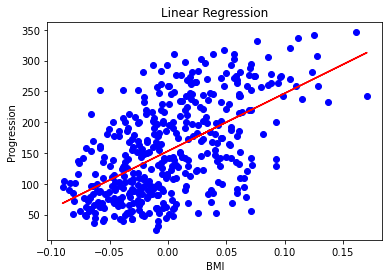

In [81]:
plt.scatter(X_train , y_train , color='blue');
plt.plot(X_train , reg_mdl.predict(X_train) , color='red');
plt.title('Linear Regression')
plt.xlabel('BMI')
plt.ylabel('Progression')
plt.show();